# Лабораторная работа №1

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [2]:
happy_data = pd.read_csv('us_counties_covid19_daily.csv', sep = ',' )

## 2)Основные характеристики датасета

In [3]:
# Первые пять строк датасета
happy_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
# Размер датасета
happy_data.shape

(800437, 6)

In [5]:
# Количество нулевых элементов
happy_data.isnull().sum()

date          0
county        0
state         0
fips       7591
cases         0
deaths    16733
dtype: int64

In [6]:
 # Колонки и их типы данных
happy_data.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [7]:
# Описание датасета
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [8]:
# Статистические данные
happy_data.describe()

,fips,cases,deaths
count,792846.000000,800437.000000,783704.000000
mean,31238.198828,1589.667358,48.815309
std,16289.192418,8385.201329,440.482993
min,1001.000000,0.000000,0.000000
25%,18179.000000,29.000000,0.000000
50%,29209.000000,175.000000,3.000000
75%,46097.000000,775.000000,17.000000
max,78030.000000,439538.000000,24346.000000


In [9]:
# Удаляем столбец date
happy_data = happy_data.drop('date', axis = 1)

In [10]:
# Первые пять строк датасета
happy_data.head()

,county,state,fips,cases,deaths
0,Snohomish,Washington,53061.0,1,0.0
1,Snohomish,Washington,53061.0,1,0.0
2,Snohomish,Washington,53061.0,1,0.0
3,Cook,Illinois,17031.0,1,0.0
4,Snohomish,Washington,53061.0,1,0.0


In [11]:
# Определим уникальные значения для целевого признака
happy_data['deaths'].unique()

array([0.0000e+00, 1.0000e+00, 3.0000e+00, ..., 2.2690e+03, 2.4346e+04,
       3.0600e+03])

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'cases'}>],
       [<AxesSubplot:title={'center':'deaths'}>, <AxesSubplot:>]],
      dtype=object)

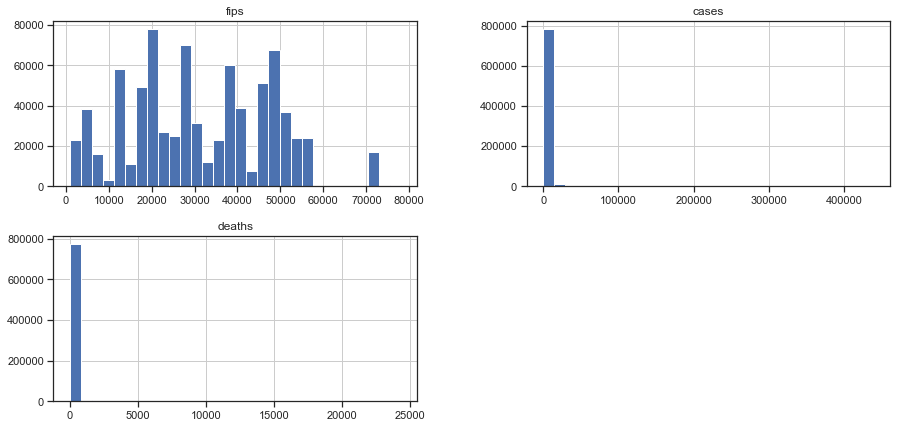

In [12]:
# Гистограммы для всех признаков
happy_data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

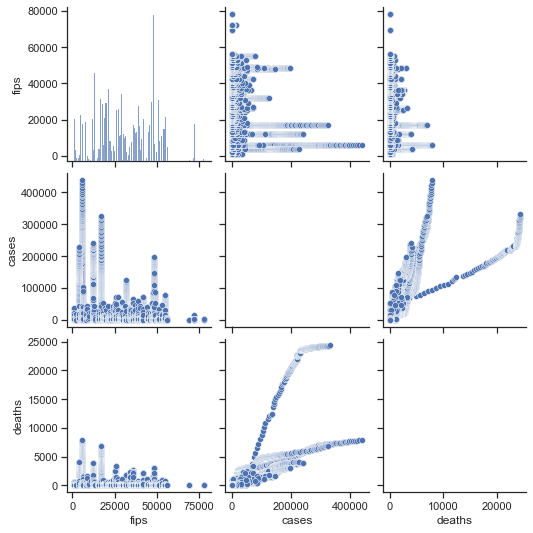

In [13]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(happy_data)

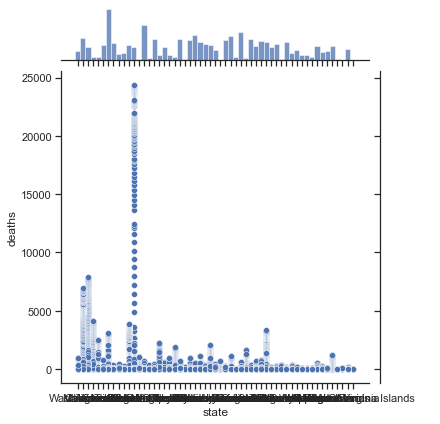

In [14]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость с уровнем счастья
sns.jointplot(x = "state", y = "deaths", kind="scatter", data = happy_data)

## 4) Корреляции признаков

In [15]:
corr_matrix = happy_data.corr()

In [16]:
corr_matrix['deaths']

fips     -0.047240
cases     0.778284
deaths    1.000000
Name: deaths, dtype: float64

<AxesSubplot:>

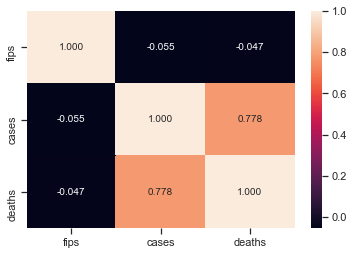

In [17]:
sns.heatmap(happy_data.corr(), annot=True, fmt='.3f')